In [1]:
import requests
import pandas as pd
import math
import numpy as np
import requests
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
from shapely.ops import unary_union

In [2]:
COMMUNES_FILES = 'data/communes-martinique.geojson'
gdf = gpd.read_file(COMMUNES_FILES)

In [3]:
INTERCO = 'data/intercommunalites-2019-france.geojson'
interco = gpd.read_file(INTERCO)

In [4]:
gdf

,code,nom,geometry
0,97201,Ajoupa-Bouillon,"POLYGON ((-61.14848 14.80590, -61.15340 14.805..."
1,97202,Anses-d'Arlet,"MULTIPOLYGON (((-61.05330 14.45579, -61.05472 ..."
2,97203,Basse-Pointe,"POLYGON ((-61.16381 14.81601, -61.16249 14.818..."
3,97204,Carbet,"POLYGON ((-61.16765 14.67530, -61.16847 14.676..."
4,97205,Case-Pilote,"POLYGON ((-61.11754 14.62759, -61.11877 14.628..."
5,97206,Diamant,"MULTIPOLYGON (((-61.05793 14.50678, -61.05356 ..."
6,97207,Ducos,"POLYGON ((-61.00063 14.55991, -61.00108 14.560..."
7,97208,Fonds-Saint-Denis,"POLYGON ((-61.12165 14.71927, -61.12344 14.719..."
8,97209,Fort-de-France,"POLYGON ((-61.10080 14.69536, -61.09925 14.697..."
9,97210,François,"MULTIPOLYGON (((-60.93572 14.58822, -60.93520 ..."


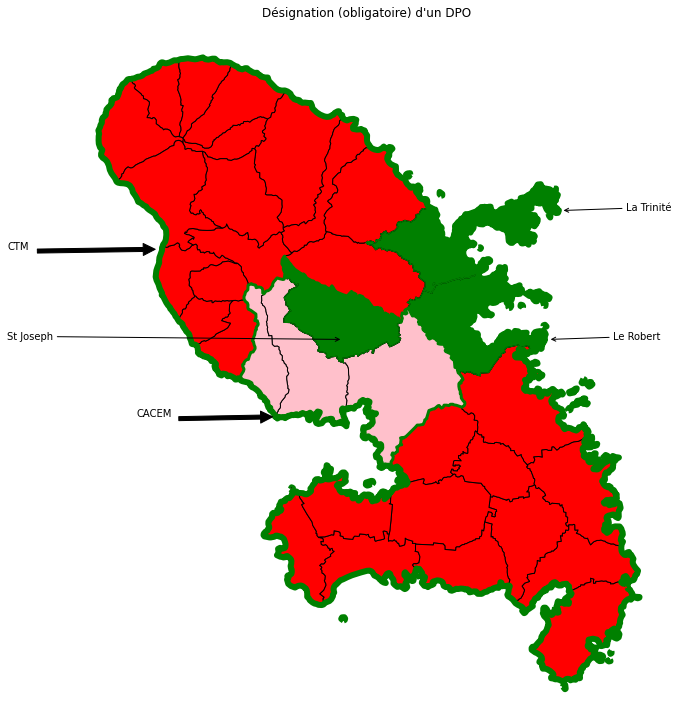

In [5]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 10))
fig.suptitle("Désignation (obligatoire) d'un DPO")


gdf.loc[~gdf.code.astype(int).isin([97222, 97230, 97224])].plot(ax=ax, color="red", edgecolor="black", linewidth=1)

gdf.loc[gdf.code.astype(int).isin([97209, 97229, 97224, 97213])].plot(ax=ax, color="pink", edgecolor="black", linewidth=1)
gdf.loc[gdf.code.astype(int).isin([97222, 97230, 97224])].plot(ax=ax, facecolor='green', edgecolor="black", linewidth=1)
gdf.loc[gdf.code.astype(int).isin([97222, 97230, 97224])].boundary.plot(ax=ax, color='green', linewidth=1)
cacem = gpd.GeoSeries(unary_union(gdf.loc[gdf.code.astype(int).isin([97209, 97229, 97224, 97213])].geometry))
cacem.boundary.plot(ax=ax, color='green', linewidth=3)

mq = gpd.GeoSeries(unary_union(gdf.geometry))
mq.boundary.plot(ax=ax, color='green', linewidth=6)


ax.annotate('CTM', xy=(-61.18, 14.73), xytext=(-61.3, 14.73),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('CACEM', xy=(-61.09, 14.6), xytext=(-61.2, 14.6),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('St Joseph', xy=(-61.04, 14.66), xytext=(-61.3, 14.66),
            arrowprops=dict(arrowstyle="->", facecolor='black'))

ax.annotate('Le Robert', xy=(-60.88, 14.66), xytext=(-60.83, 14.66),
            arrowprops=dict(arrowstyle="->", facecolor='black'))

ax.annotate('La Trinité', xy=(-60.87, 14.76), xytext=(-60.82, 14.76),
            arrowprops=dict(arrowstyle="->", facecolor='black'))


_ = ax.axis('off')
fig.savefig('output/2022-11-22.png', facecolor='white')